In [1]:
setwd("../Data")

mydrias<-read.csv("tasmintasmaxtaspr_metro_IPSL_WRF_histo_QT_REF_19750101-19851231.txt", header = FALSE, sep=";", skip=62)
#mydrias <- read.csv("tasmintasmaxtaspr_metro_IPSL_WRF_histo_QT_REF_19750101-19851231.txt", header = FALSE, skip=62)

colnames(mydrias) <- c("date","idpt","lat","lon","alti","Tn","Tx","Tm","RR") ## A adapter en fonction de vos données
head(mydrias)
#mydrias$RR <- mydrias$RR
##mydrias$RRs <- NULL ## supprime colonne
## Combien de points de grille ?
mydrias.pts <- unique(mydrias[,c("idpt","lon","lat","alti")])
str(mydrias.pts)

## Sauvegarde les points de grille au format csv -> pour récupération avec QGIS
write.csv(mydrias.pts,file="ptsdrias.csv",quote=FALSE,row.names=FALSE)

,date,idpt,lat,lon,alti,Tn,Tx,Tm,RR
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,01/01/1975,9378,46.2218,3.94455,302,-3.32,2.16,-0.78,0.00
2,02/01/1975,9378,46.2218,3.94455,302,-3.17,2.93,-0.90,0.00
3,03/01/1975,9378,46.2218,3.94455,302,-4.36,-1.67,-2.78,0.00
4,04/01/1975,9378,46.2218,3.94455,302,-5.40,-0.32,-3.27,0.00
5,05/01/1975,9378,46.2218,3.94455,302,-2.70,2.52,-0.02,1.06
6,06/01/1975,9378,46.2218,3.94455,302,-2.41,4.47,1.06,0.00


'data.frame':	497 obs. of  4 variables:
 $ idpt: int  9378 9379 9380 9381 9382 9386 9521 9522 9523 9524 ...
 $ lon : num  3.94 4.05 4.15 4.26 4.36 ...
 $ lat : num  46.2 46.2 46.2 46.2 46.2 ...
 $ alti: int  302 308 394 363 506 186 287 294 400 404 ...


In [2]:
#####################################################################
##               Evaluation des données DRIAS
#####################################################################
## Calcul de la climatologie des données Drias pas de temps mensuel
## Comparaison avec données observées MF
## 
#####################################################################

## Charge le package xts
library(xts)

## calcul des moyennes mensuelles toutes années confondus
## initalise les objets pour l'ensemble des résultats
resuTn <- c(); resuTx <- c(); resuRR <- c()
for(i in 1:nrow(mydrias.pts)){
    tmp <- subset(mydrias,mydrias$idpt==mydrias.pts[i,"idpt"])
    mydates <- as.Date(as.character(tmp$date),"%d/%m/%Y")
    tmpxts <- xts(tmp[,c("idpt","Tn","Tx","RR")], order.by=mydates)
    ## initialise objet vide pour moyenne mensuelle
    rmoiTn <- c();rmoiTx <- c();rmoiRR <- c()
    for(j in 1:12){
        moi <- tmpxts[.indexmon(tmpxts) %in% (j-1)]
        rmoiTn <- cbind(rmoiTn,colMeans(moi[,"Tn"]))
        rmoiTx <- cbind(rmoiTx,colMeans(moi[,"Tx"]))
        tmprr <- apply.monthly(moi[,"RR"],sum)
        rmoiRR <- cbind(rmoiRR,colMeans(tmprr))
        }
    resuTn <- rbind(resuTn,rmoiTn)
    resuTx <- rbind(resuTx,rmoiTx)
    resuRR <- rbind(resuRR,rmoiRR)
}
## Ajoute les noms des colonnes
colnames(resuTn) <- month.abb
colnames(resuTx) <- month.abb
colnames(resuRR) <- month.abb

head(resuRR)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
RR,68.43182,58.23818,50.95909,64.94000,110.68091,70.60273,86.65818,55.95545,64.03182,72.66545,80.46727,80.70182
RR,68.63000,62.43364,47.92545,69.79000,113.34273,74.18455,75.97727,54.03636,67.79545,80.01818,71.87818,78.54545
RR,75.39182,66.14455,48.82727,78.86455,123.11364,78.65909,79.94455,54.63273,75.55545,77.98000,78.53636,84.55545
RR,74.45818,65.33364,48.24000,77.89818,121.68818,77.63727,78.89727,53.95091,74.56364,76.99000,77.54273,83.53182
RR,81.55000,65.86545,56.38000,77.06273,115.80636,83.10545,78.75636,57.52455,67.52182,76.65000,94.77273,89.88455
RR,73.41636,54.93273,63.51545,62.45455,83.32545,73.64545,62.64091,51.68909,58.90364,74.88000,74.76727,71.57818


In [3]:
head(resuTx)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Tx,5.034809,5.385466,11.011994,13.52694,15.63968,18.40845,22.95548,23.74132,20.06352,14.00780,8.831727,4.690323
Tx,4.961320,5.401222,10.883724,13.47648,15.58877,18.36324,22.88924,23.66326,20.06006,13.93716,8.752000,4.572023
Tx,4.009296,4.443537,10.315073,12.91664,15.05968,18.00533,22.44252,23.04211,19.11752,13.21009,8.112939,3.643842
Tx,4.150176,4.589486,10.608974,13.20812,15.35314,18.30567,22.74669,23.34196,19.37752,13.43026,8.303152,3.788211
Tx,3.471877,3.896881,9.240323,11.90100,14.04839,16.95439,21.40669,21.92487,18.27497,12.47815,7.453576,3.238035
Tx,5.076745,5.750257,11.628974,14.49470,16.95985,19.91982,24.36475,24.79202,20.72936,14.70548,9.166727,4.689296


In [4]:
dim(resuTx)

[1] 497  12

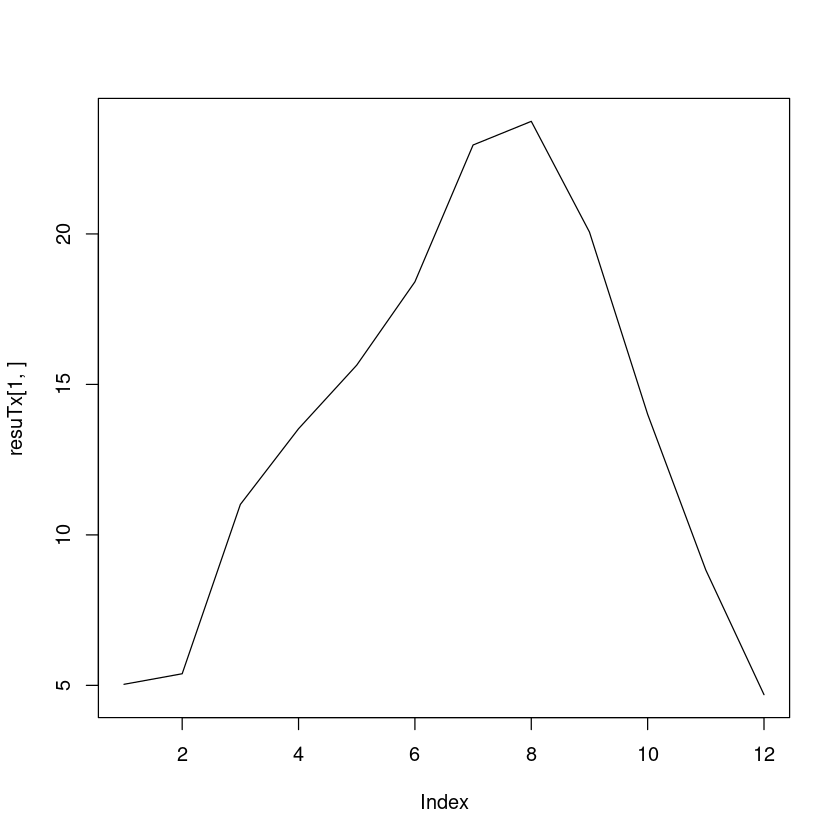

In [5]:
######################################################################
## Vérifier avec un graphique que les résultats pour la température
## sont cohérents
######################################################################

plot(resuTx[1,], type="l") ## Trace le cycle annuel des Tx pour la 1er point de grille

In [6]:
############### Stations MF ########################
#######lecture et chargement des données mensuelles ################

mydataMFtn <- read.csv("MFTnMois.csv")
mydataMFtx <- read.csv("MFTxMois.csv")
mydataMFRR <- read.csv("MFRRMois.csv")
MFst <- read.csv("MFCoordStations.csv")

head(mydataMFtx)

,dates,X1089001,X3043001,X3059001,X3060001,X3130002,X3159001,X3240001,X3310001,X3321001,⋯,X89165001,X89173001,X89206001,X89253001,X89273001,X89311001,X89342001,X89349001,X89387002,X90056002
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
1,1961-01-31,6.283871,6.416129,5.935484,6.951613,6.154839,6.387097,NA,6.848387,7.129032,⋯,NA,NA,NA,NA,NA,NA,NA,3.406452,5.806452,NA
2,1961-02-28,12.446429,13.650000,13.107143,14.214286,13.082143,13.657143,NA,14.410714,13.178571,⋯,NA,NA,NA,NA,NA,NA,NA,10.357143,12.639286,NA
3,1961-03-31,15.022581,14.803226,14.903226,15.035484,14.758065,15.000000,NA,16.238710,14.774194,⋯,NA,NA,NA,NA,NA,NA,NA,12.161290,14.774194,NA
4,1961-04-30,19.033333,19.333333,18.766667,19.040000,18.386667,18.853333,NA,19.530000,18.233333,⋯,NA,NA,NA,NA,NA,NA,NA,15.193333,18.243333,NA
5,1961-05-31,18.767742,19.338710,19.451613,18.467742,18.774194,19.009677,NA,19.677419,18.161290,⋯,NA,NA,NA,NA,NA,NA,NA,14.722581,18.751613,NA
6,1961-06-30,24.080000,24.003333,24.133333,23.316667,23.193333,23.296667,NA,23.773333,23.433333,⋯,NA,NA,NA,NA,NA,NA,NA,19.186667,23.376667,NA


In [7]:
head(MFst)

,DPT,NumStation,alti,lat,lon,LonLB2,LatLB2
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1089001,250,45.976,5.329,831846.6,2112830
2,3,3043001,315,46.187,3.267,671827.3,2132295
3,3,3059001,280,46.275,3.227,668628.9,2142040
4,3,3060001,249,46.166,3.398,681970.8,2130089
5,3,3130002,260,46.663,2.729,630032.9,2184852
6,3,3159001,400,46.300,2.777,633931.8,2144525


In [8]:
## Repérage des dates d'intérêt ici de 1975 à 1985
mydataMFtn$dates <- as.character(mydataMFtn$dates)
start <- min(which(substr(x = mydataMFtn$dates,start = 1,stop = 4)=='1975'))
end <- max(which(substr(mydataMFtn$dates,1,4)=='1985'))

In [9]:
start ## Repère la 1ere ligne qui correspond à l'année 1975

[1] 169

In [11]:
end ## Repère la dernière ligne qui correspond à l'année 1985

[1] 300

In [12]:
## Création d'un vecteur de dates
mydates <- as.Date(mydataMFtn$dates[start:end],"%Y-%m-%d")
## mois d'appartenance de chaque data
mois <- format(mydates,"%m")

In [13]:
mydataMFtn <- mydataMFtn[start:end,-1] ## supprime la 1er col
mydataMFtx <- mydataMFtx[start:end,-1]
mydataMFRR <- mydataMFRR[start:end,-1]

In [14]:
head(mydataMFtn)

,X1089001,X3043001,X3059001,X3060001,X3130002,X3159001,X3240001,X3310001,X3321001,X10130001,⋯,X89165001,X89173001,X89206001,X89253001,X89273001,X89311001,X89342001,X89349001,X89387002,X90056002
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
169,2.367742,2.1709677,1.290323,2.019355,1.3516129,2.0838710,1.66129032,2.112903,3.074194,3.2258065,⋯,2.825806,NA,NA,2.3258065,2.277419,NA,NA,1.5548387,3.99677419,0.1612903
170,-1.478571,-0.9464286,-1.178571,-2.360714,-0.9464286,-0.9107143,-0.03571429,-0.375000,-0.150000,-0.6321429,⋯,-1.296429,NA,NA,-0.2821429,-1.296429,NA,NA,-1.1071429,0.08928571,-2.4178571
171,1.583871,1.3387097,1.129032,1.167742,1.1354839,0.3870968,1.21612903,1.951613,1.990323,1.6064516,⋯,1.058065,NA,NA,1.1677419,0.783871,NA,NA,0.2903226,2.20000000,-0.2612903
172,3.570000,3.9000000,3.466667,2.743333,3.2066667,2.9933333,3.75333333,4.666667,4.290000,3.9633333,⋯,2.376667,NA,NA,3.9166667,3.546667,NA,NA,2.1466667,4.52333333,2.5466667
173,7.548387,7.1193548,6.483871,6.377419,6.0161290,5.7032258,7.30967742,8.274194,7.496774,6.5258065,⋯,5.790323,NA,NA,6.6258065,6.377419,NA,NA,5.3935484,7.17741935,6.2322581
174,10.023333,10.2766667,9.866667,9.486667,8.1700000,8.7333333,10.73666667,11.500000,10.703333,10.1566667,⋯,8.556667,NA,NA,9.9900000,8.740000,NA,NA,8.0966667,10.61000000,9.3900000


In [15]:
## calcul de la moyenne mensuelle pour chaque station MF
climonthRR <- c(); climonthtn <- c();climonthtx <- c()
for(i in 1:ncol(mydataMFRR)){
  tmpRR <- mydataMFRR[,i]
  tmptn <- mydataMFtn[,i]
  tmptx <- mydataMFtx[,i]
  climonthRR <- cbind(climonthRR,aggregate(tmpRR,by=list(mois),FUN = mean)$x)
  climonthtn <- cbind(climonthtn,aggregate(tmptn,by=list(mois),FUN = mean)$x)
  climonthtx <- cbind(climonthtx,aggregate(tmptx,by=list(mois),FUN = mean)$x)
}

In [17]:
dim(climonthRR) ## dimension de l'objet : mois en ligne et stations en colonnes

[1]  12 143

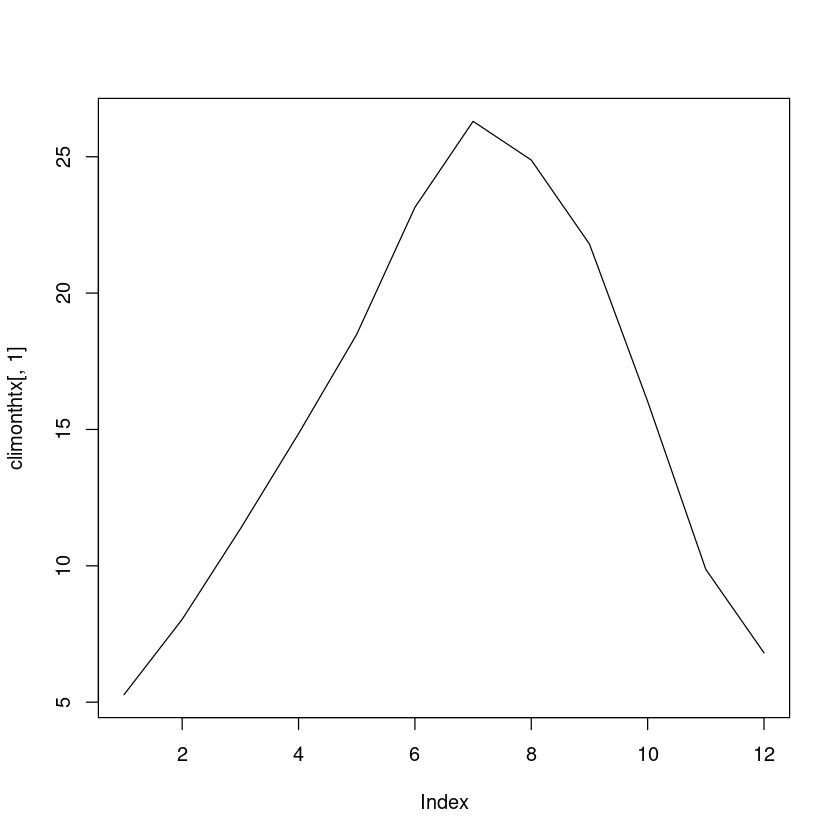

In [18]:
## Trace le cycle annuel pour la première station
plot(climonthtx[,1], type="l")

In [19]:
############################################################################
## création d'un objet contenant les numéros des département de la Bourgogne
## afin de sélectionner les stations de cette région
dep <- c(21, 58, 71, 89)
## sélection des stations
MFst <- MFst[MFst$DPT %in% dep,] ## Selection les département de la Bourgogne

In [20]:
head(MFst)

,DPT,NumStation,alti,lat,lon,LonLB2,LatLB2
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
14,21,21010001,273,47.069,4.861,791700.7,2232984
15,21,21012001,277,47.808,4.529,764205.9,2314354
16,21,21023001,365,47.133,4.493,763568.4,2239264
17,21,21043001,415,47.600,4.645,773570.3,2291486
18,21,21056001,250,47.413,5.208,816643.4,2272104
19,21,21109001,234,47.916,4.659,773584.8,2326637


In [21]:
tail(MFst)

,DPT,NumStation,alti,lat,lon,LonLB2,LatLB2
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
137,89,89253001,225,47.565,3.599,694995.4,2285809
138,89,89273001,222,47.620,3.152,661298.9,2291479
139,89,89311001,210,47.782,3.403,679921.2,2309715
140,89,89342001,62,48.225,3.266,669072.9,2358844
141,89,89349001,464,47.357,4.063,730412.1,2263354
142,89,89387002,70,48.167,3.288,670785.8,2352414


In [22]:
dim(MFst) ## 75 stations sont situées en Bourgogne

[1] 75  7

In [23]:
############################################################################
## création d'un objet contenant les numéros des département de la Bourgogne
## afin de sélectionner les stations de cette région
dep <- c(21, 58, 71, 89)
## sélection des stations
MFst <- MFst[MFst$DPT %in% dep,] ## Selection les département de la Bourgogne

In [ ]:
## Charge la librairie spatstat qui va nous permettre de faire l'appariement 
## stations MF vs point de grille Drias du modèle climatique le plus proche
library(spatstat)

In [29]:
## Création d'objets spatiaux ppp pour les stations MF & pour les points de grille Drias
MFst.ppp <- ppp(x=MFst$lon, y=MFst$lat,
                window=owin(c(min(MFst$lon),max(MFst$lon)),c(min(MFst$lat),max(MFst$lat))), marks=MFst$alti)
drias.ppp <- ppp(mydrias.pts$lon,mydrias.pts$lat,
                 c(min(mydrias.pts$lon),max(mydrias.pts$lon)),
                 c(min(mydrias.pts$lat),max(mydrias.pts$lat)),
                 marks=mydrias.pts$alti)

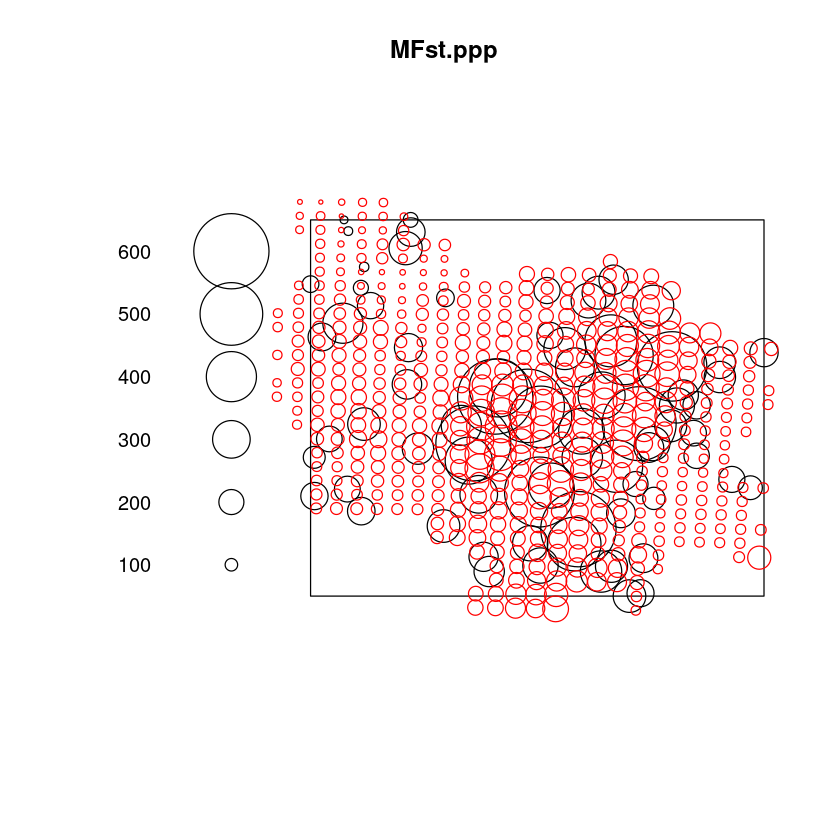

In [30]:
## Trace la carte des stations et des points de grille
plot(MFst.ppp)
plot(drias.ppp, col="red", add=TRUE)

In [31]:
## Cherche le point de grille Drias plus proche voisin (nearest neighbour) de chaque station MF
ind <- nncross(MFst.ppp,drias.ppp)$which

In [32]:
## récupération des points de grille Drias concernés
driasTn.MF <- resuTn[ind,]
driasTx.MF <- resuTx[ind,]
driasRR.MF <- resuRR[ind,]
dim(driasRR.MF)

[1] 75 12

In [35]:
## Supprime le X qui est avant chaque numéro de station
numStMF <- as.integer(gsub('X',"",colnames(mydataMFtn)))

In [36]:
head(numStMF)

[1] 1089001 3043001 3059001 3060001 3130002 3159001

In [37]:
## Sélection des moyennes mensuelle de chaque station de Bourgogne
MF.tn <- climonthtn[,numStMF %in% MFst$NumStation]
MF.tn <- t(MF.tn)
MF.tx <- climonthtx[,numStMF %in% MFst$NumStation]
MF.tx <- t(MF.tx)
MF.RR <- climonthRR[,numStMF %in% MFst$NumStation]
MF.RR <- t(MF.RR)

In [38]:
class(driasTn.MF)

[1] "matrix" "array"

In [39]:
## transforme les données en vecteur pour la comparaison
driastn <- as.vector(driasTn.MF)
MFtn <- as.vector(MF.tn)
driastx <- as.vector(driasTx.MF)
MFtx <- as.vector(MF.tx)
driasRR <- as.vector(driasRR.MF)
MFRR <- as.vector(MF.RR)

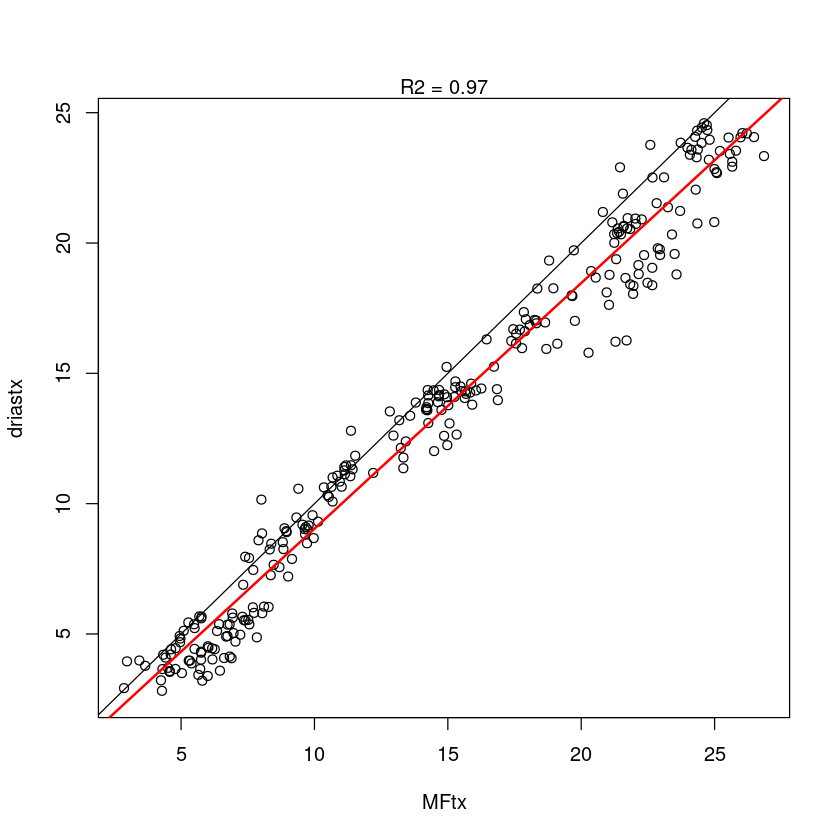

In [40]:
## Trace la graphique de comparaison station vs point de grille Drias
plot(MFtx,driastx)
## Trace la bissectrice (i.e. accord parfait)
abline(a=0, b = 1)
## Trace la droite de l'ajustement linéeaire
abline(lm(driastx~MFtx), col = "red", lwd=2)
## Calcul du coefficient de détermination et 
R2 <- cor(MFtx,driastx, use = "pairwise.complete.obs")^2
mtext(paste0("R2 = ", round(R2, 3)),side = 3)

In [41]:
lm(driastx~MFtx) ## Coeffcient de l'ajustement linéraire


Call:
lm(formula = driastx ~ MFtx)

Coefficients:
(Intercept)         MFtx  
    -0.3871       0.9426  
